<a href="https://colab.research.google.com/github/SanketManka/Hotel_booking_analysis/blob/main/Final(7_11_22)_of_Hotel_booking(0_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing requride python libraries.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
# Mounting the drive
from google.colab import drive                    
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset
hotel_dataset = pd.read_csv("/content/drive/MyDrive/almabetter Data/Hotel Booking Analysis/Hotel Bookings.csv")          

In [ ]:
hotel_dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# taking information
hotel_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_dataset.head(10)         

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
hotel_dataset.tail(10)  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In above dataset We can see that there are 32 columns
and also some columns like 'children', 'company', 'country' and 'agent' have null values.

In [ ]:
# Creating a copy of hotel booking data.

hotel_dataset_copy = hotel_dataset.copy()

### **Data Cleaning**
Before EDA, cleaning data is crucial as it allows the ambigous data to be removed from the process.

### <b> Step 1: Remove rows if duplicate found. </b>

In [ ]:
#Show no. row in row in double row in double row.
hotel_dataset_copy[hotel_dataset_copy.duplicated()].shape   

(31994, 32)

In [ ]:
# Remove duplicate values.
hotel_dataset_copy.drop_duplicates(inplace = True)

In [ ]:
hotel_dataset_copy.shape

(87396, 32)

### <b> Step2: Manage missing values. </b>

In [ ]:

# find the columns that have non values 
nan_values =hotel_dataset_copy.isnull().sum().sort_values(ascending=True)
# print only  that have values gretter than 0 
nan_values[nan_values>0]

children        4
country       452
agent       12193
company     82137
dtype: int64

As a result, the company and agent columns now contain the company number and agent number.Some customers may not book a hotel through an agent or through a company.Therefore, these columns are null in this case. Therefore, these columns are null in this case. 

In [ ]:
hotel_dataset_copy[['company','agent']] = hotel_dataset_copy[['company','agent']].fillna(0)

In [ ]:
hotel_dataset_copy['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This "child" column  has a value of 0, which means there are 0 children  in the group of customers who made this transaction.  
 Therefore, "nan" values ​​are values ​​that are  missing  due to a data write error. 
  
 Replace the null values ​​under this column with the mean  of the children.

In [ ]:
hotel_dataset_copy['children'].fillna(hotel_dataset_copy['children'].mean(), inplace = True)

The next column with the missing value is ``country''. 
 This column represents the customer's country of origin. \ 
 Because this column has string data type. We will replace the missing value with the mode of the 'country' column.

In [ ]:
hotel_dataset_copy['country'].fillna('others', inplace = True)

In [ ]:
# Check if all null values ​​are cleared.
hotel_dataset_copy.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

Some lines have a total  of zero adults, children or infants. We will therefore delete these lines.

In [ ]:
hotel_dataset_copy[hotel_dataset_copy['adults']+hotel_dataset_copy['babies']+hotel_dataset_copy['children'] == 0].shape

(166, 32)

In [ ]:
hotel_dataset_copy.drop(hotel_dataset_copy[hotel_dataset_copy['adults']+hotel_dataset_copy['babies']+hotel_dataset_copy['children'] == 0].index, inplace = True)

### <b> Step 3: Convert the column to the appropriate data type. </b>

In [ ]:
# Convert datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_dataset_copy[['children', 'company', 'agent']] = hotel_dataset_copy[['children', 'company', 'agent']].astype('int64')


In [ ]:
# change datatype of column 'reservation_status_date' to data_type.
hotel_dataset_copy['reservation_status_date'] = pd.to_datetime(hotel_dataset_copy['reservation_status_date'], format = '%Y-%m-%d')

### <b> Step 4: Creat important columns for making EDA Easy. </b>

In [ ]:
# Add total  days of stay at hotels
hotel_dataset_copy['total_stay'] = hotel_dataset_copy['stays_in_weekend_nights']+hotel_dataset_copy['stays_in_week_nights']

# Added the total number of people  as a column, i.e. total people num = num of adults + children + babies
hotel_dataset_copy['total_people'] = hotel_dataset_copy['adults']+hotel_dataset_copy['children']+hotel_dataset_copy['babies']

We add this column so that we can analyze the length of stay in hotels. 

## Exploratory data analysis (EDA) ##

In [ ]:
num_hotel_df = hotel_dataset_copy[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


In [ ]:
 num_hotel_df.corr()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
lead_time,1.000000,0.005370,-0.079021,0.080822,0.131909,0.021948,-0.086736,0.034048,0.320914,0.125262
previous_cancellations,0.005370,1.000000,0.391766,-0.010267,0.003733,-0.050359,-0.003480,0.001695,-0.021635,-0.045222
previous_bookings_not_canceled,-0.079021,0.391766,1.000000,0.005774,-0.006334,-0.086052,0.040712,0.027044,-0.064973,-0.114406
booking_changes,0.080822,-0.010267,0.005774,1.000000,0.024143,0.010144,0.050659,0.018308,0.062366,0.002619
days_in_waiting_list,0.131909,0.003733,-0.006334,0.024143,1.000000,-0.032522,-0.015995,-0.049438,-0.010599,-0.024488
adr,0.021948,-0.050359,-0.086052,0.010144,-0.032522,1.000000,0.038733,0.137461,0.056102,0.382210
required_car_parking_spaces,-0.086736,-0.003480,0.040712,0.050659,-0.015995,0.038733,1.000000,0.048479,-0.049179,0.030905
total_of_special_requests,0.034048,0.001695,0.027044,0.018308,-0.049438,0.137461,0.048479,1.000000,0.040800,0.127876
total_stay,0.320914,-0.021635,-0.064973,0.062366,-0.010599,0.056102,-0.049179,0.040800,1.000000,0.107087
total_people,0.125262,-0.045222,-0.114406,0.002619,-0.024488,0.382210,0.030905,0.127876,0.107087,1.000000


First, let's look at the correlation between the numerical data\
 \


Columns like:-
> 
( 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' )

 \
 are categorical data having numerical type. So we wont need to check them for correlation.\


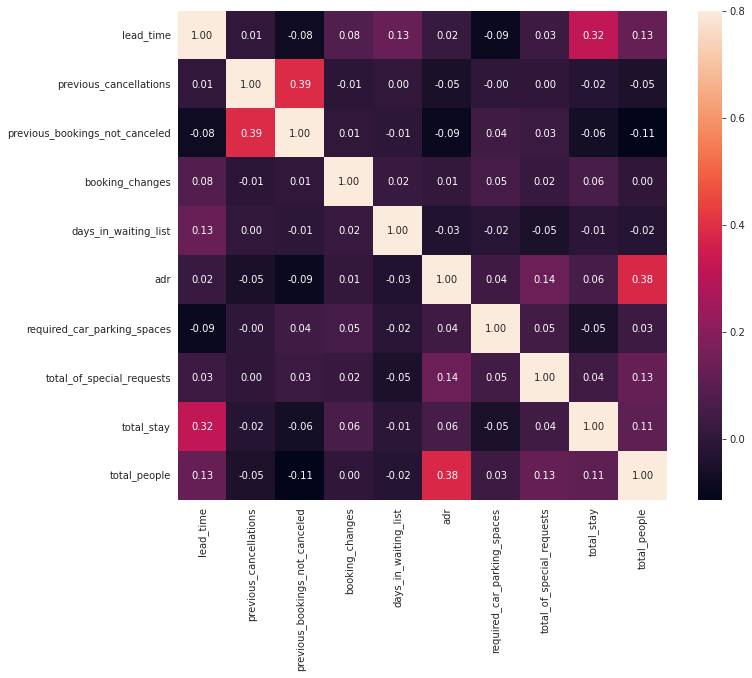

In [ ]:
#BY using correlation matrix check 
co_matrix = num_hotel_df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(co_matrix,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8,square=True);

1) First we find the slight co-relation between Total stay length & lead Time. As a result we understand that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

let's Check the affects of length of stay on adr .

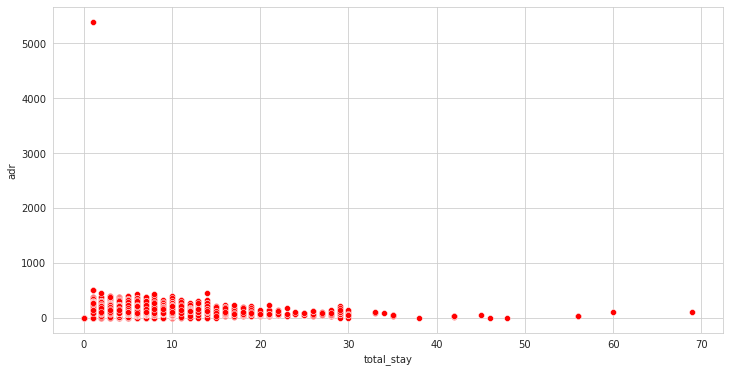

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_dataset_copy,color='red')
plt.show()

From the above scatterplot we  notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
hotel_dataset_copy.drop(hotel_dataset_copy[hotel_dataset_copy['adr'] > 5000].index, inplace = True)

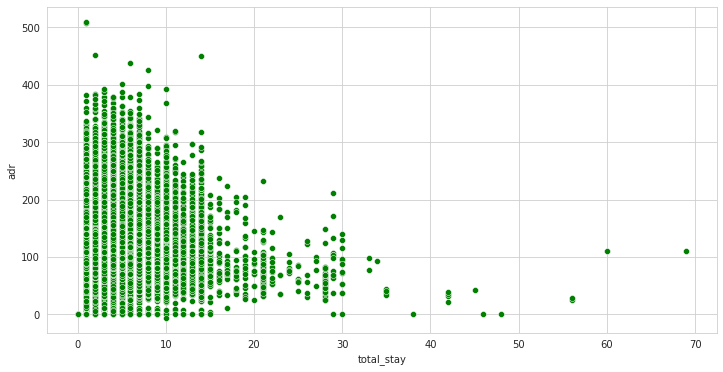

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_dataset_copy,color='g')
plt.show()

In this scatter plot We can see that as length of total_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalized.

# Typology of “hotel” and “customer”
 ( Type of “hotel” and “customer”)






In [ ]:
# Type of Hotels.
hotels=hotel_dataset_copy['hotel'].unique()
hotels

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# count of city hotel and Resort hotels.
sns.set_style("whitegrid")
plt.show()
Diff_Hotel = hotel_dataset_copy['hotel'].value_counts()
Diff_Hotel

City Hotel      53273
Resort Hotel    33956
Name: hotel, dtype: int64

# Statistical analysis

Q1) Which room type is in most demand and which room type generates highest adr?

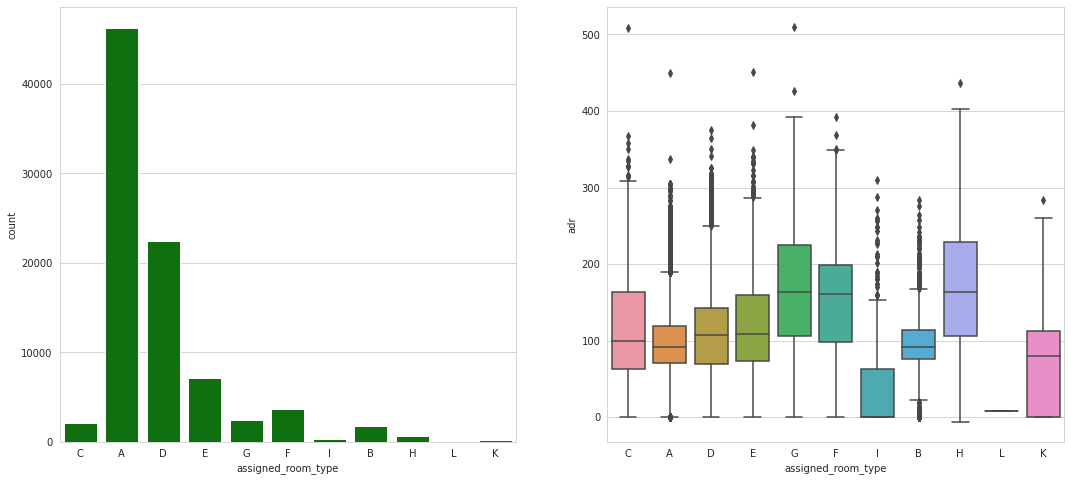

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

Rooms_groupby = hotel_dataset_copy.groupby('assigned_room_type')
hotel_dataset_copy['Num_of_bookings'] = Rooms_groupby.size()

sns.countplot(ax = axes[0], x = hotel_dataset_copy['assigned_room_type'],color='g',)
sns.boxplot(ax = axes[1], x = hotel_dataset_copy['assigned_room_type'], y = hotel_dataset_copy['adr'])
plt.show()


The frequently demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

Q2) Most preffered meal of customers?

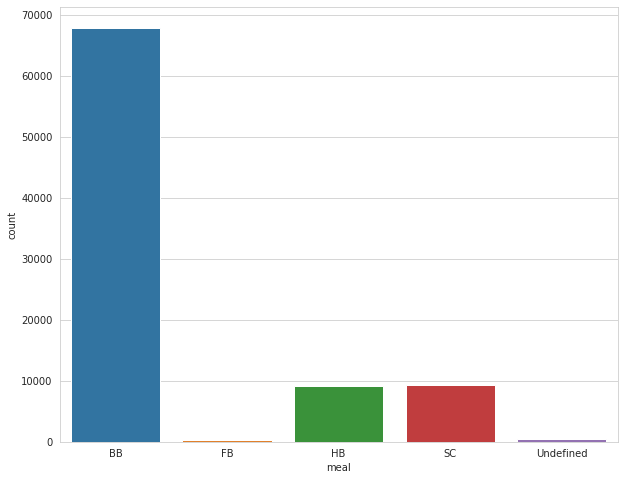

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = hotel_dataset_copy['meal'])
plt.show()

BB (bed and Breakfast) is the most Preferrd meal.



#  Hotel wise analysis </b>

Q1) What is percentage of bookings in each hotel?

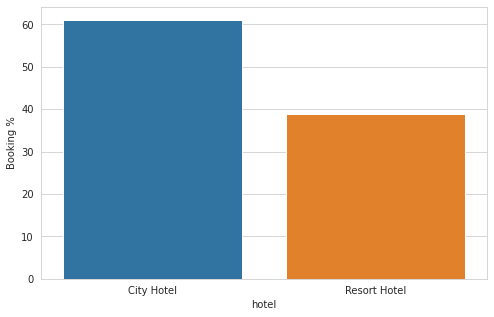

In [ ]:
#Calculat percentage of bookings in each hotel
hotel_groupby = hotel_dataset_copy.groupby('hotel')
dataset_1 = pd.DataFrame((hotel_groupby.size()/hotel_dataset_copy.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      
plt.figure(figsize = (8,5))
sns.barplot(x = dataset_1['hotel'], y = dataset_1['Booking %'])
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

Q2) Which agent makes most no. of bookings?

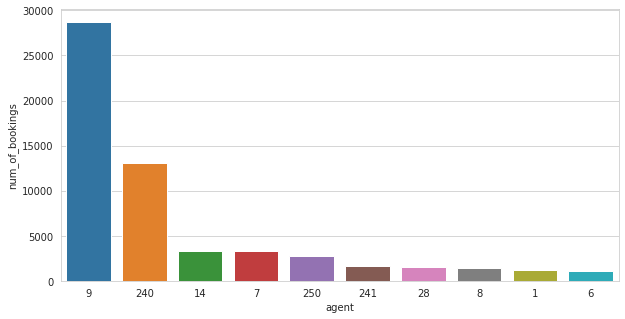

In [ ]:
data_1 = pd.DataFrame(hotel_dataset_copy['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
# 0 represents that booking is not made by an agent
data_1.drop(data_1[data_1['agent'] == 0].index, inplace = True)            
# Selecting top 10 performing agents
data_1 = data_1[:10]                                                  
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = data_1, order = data_1.sort_values('num_of_bookings', ascending = False).agent)

Q3) Which hotel genrate more revenue?

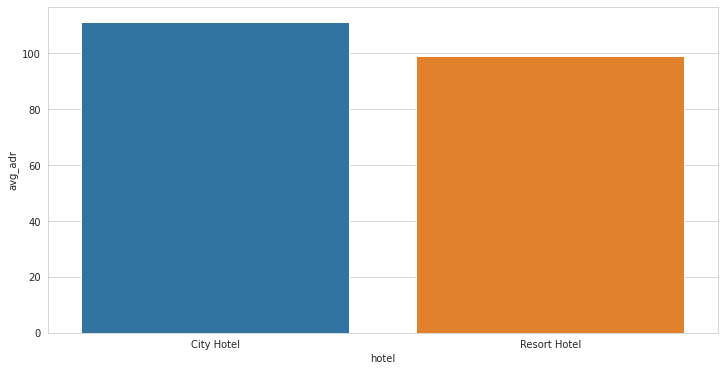

In [ ]:
 # Finding average adr
dataset_3 = hotel_groupby['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   
plt.figure(figsize = (12,6))
sns.barplot(x = dataset_3['hotel'], y = dataset_3['avg_adr'] )
plt.show()

Average  adr (Average Daily Rate) of Resort hotel is slightly lower than the  City hotel. Hence, City hotel have slightly more revenue.

Q4) Which hotel has higher lead time?

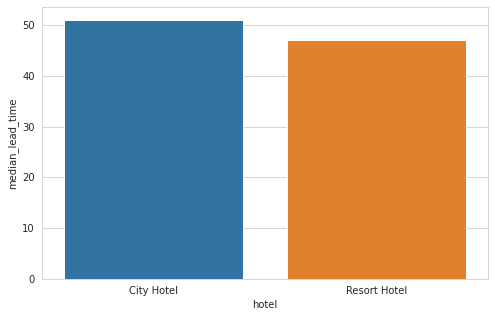

In [ ]:
dataset_2 = hotel_groupby['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = dataset_2['hotel'], y = dataset_2['median_lead_time'] )
plt.show()

From above bar-plot we can see that City hotel has slightly higher median lead time. 



Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

Q5) Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_booking = hotel_dataset_copy[hotel_dataset_copy['is_canceled'] == 1]
cancelled_grp = cancelled_booking.groupby('hotel')
Data_1 = pd.DataFrame(cancelled_grp .size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
hotel_groupby = hotel_dataset_copy.groupby('hotel')
total_booking = hotel_groupby.size()
Data_2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
Data_3 = pd.concat([Data_1,Data_2], axis = 1)

# Calculating cancel percentage 
Data_3['cancel_%'] = round((Data_3['total_cancelled_bookings']/Data_3['total_bookings'])*100,2)
Data_3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


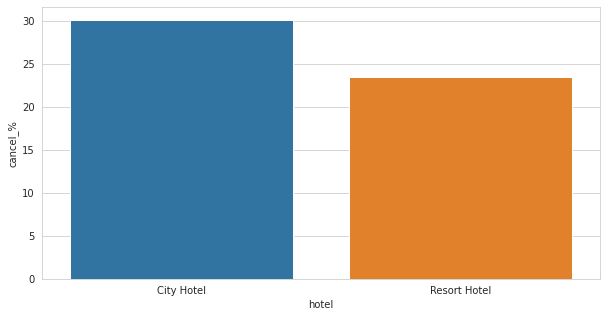

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = Data_3.index, y = Data_3['cancel_%'])
plt.show()

We easly see that 30 % of City Hotel bookings got canceled. 

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

#  Check the Market segment 
(which type of agent make high booking)
## In categories, 

#### TA = Travel Agents.
#### TO = Tour Operators.

In [ ]:
hotel_dataset_copy.market_segment.value_counts(normalize=True)

Online TA        0.591008
Offline TA/TO    0.158823
Direct           0.135047
Groups           0.056426
Corporate        0.048149
Complementary    0.007933
Aviation         0.002591
Undefined        0.000023
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



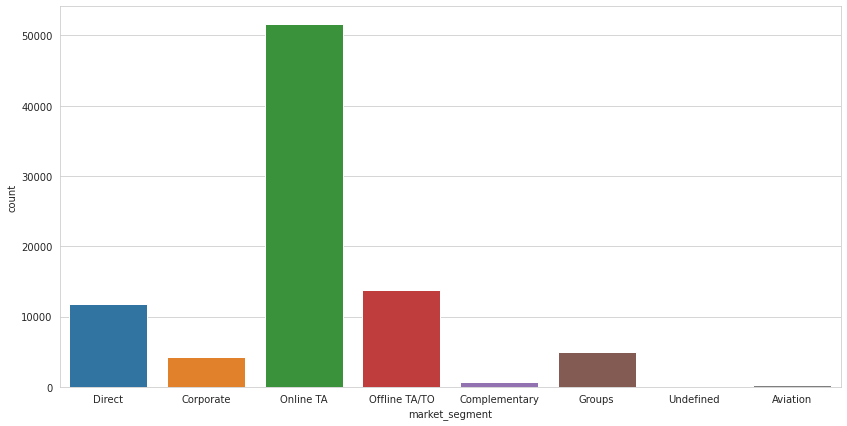

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(hotel_dataset_copy['market_segment'] )
plt.show()

## <b> (2)Analysis of distribution Channel </b>

Q1) Which type of channel use frequintly for booking hotels?

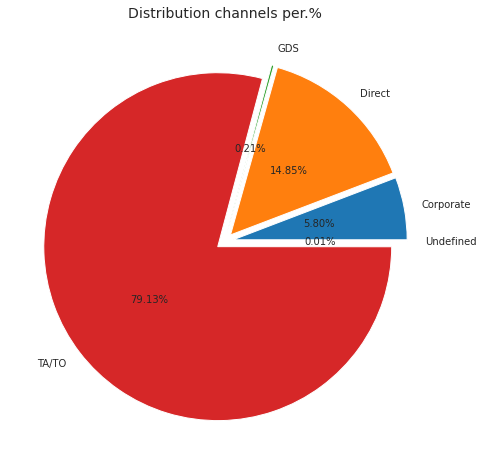

In [ ]:
#using pie graph
groupby_DC = hotel_dataset_copy.groupby('distribution_channel')
data_1 = pd.DataFrame(round((groupby_DC.size()/hotel_dataset_copy.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = data_1['Booking_%']
labels = data_1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Distribution channels per.%", fontsize=14);

Q2) Popular booking channels for early booking of hotels?

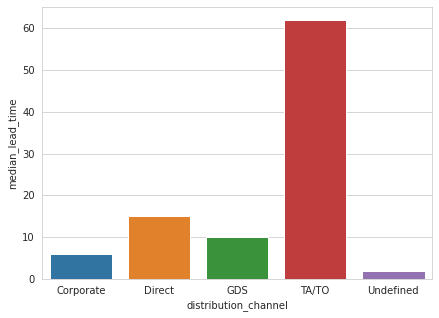

In [ ]:
#First groupby the distribution_channel.
groupby_DC = hotel_dataset_copy.groupby('distribution_channel')
data_2 = pd.DataFrame(round(groupby_DC['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
#plot 
plt.figure(figsize = (7,5))
sns.barplot(x = data_2['distribution_channel'], y = data_2['median_lead_time'])
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

Q3) Which channel has longer average waiting time?

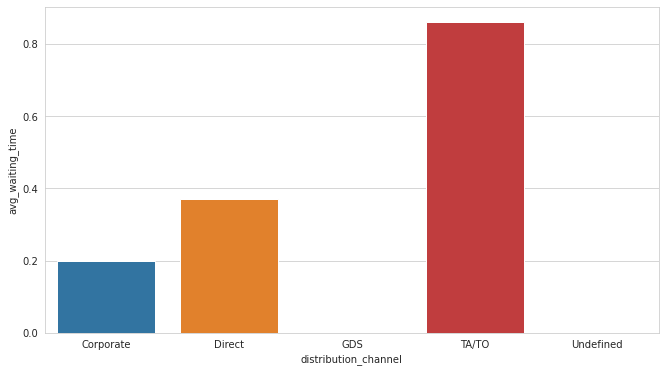

In [ ]:
#Finding waiting time.
data_4 = pd.DataFrame(round((groupby_DC['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (11,6))
sns.barplot(x = data_4['distribution_channel'], y = data_4['avg_waiting_time'])
plt.show()

GDS and Undefined has 0.
While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Q4) Which distribution channel make better revenue on deals for hotels?

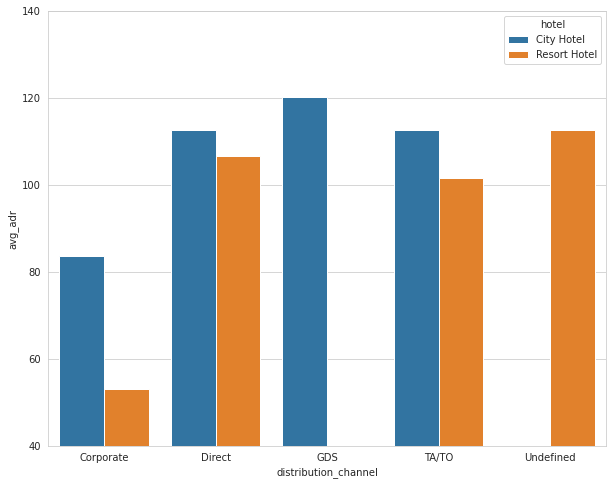

In [ ]:

groupby_DC_hotel = hotel_dataset_copy.groupby(['distribution_channel', 'hotel'])
data_5 = pd.DataFrame(round((groupby_DC_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (10,8))
sns.barplot(x = data_5['distribution_channel'], y = data_5['avg_adr'], hue = data_5['hotel'])
plt.ylim(40,140)
plt.show()

Channel GDS has higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

In order to increase revenue, resort hotels must increase their outreach on GDS channels.

## <b> (3) Cancellation Analysis </b>

*Let*s  understand why  the people cancel the booking.

Q1)Which  distribution channels have the highest cancellation rates?

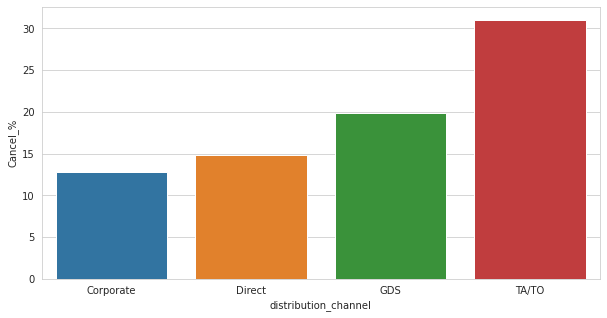

In [ ]:
data_1 = pd.DataFrame((groupby_DC['is_canceled'].sum()/groupby_DC.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = data_1.index, y = data_1['Cancel_%'])
plt.show()

 A booking via TA/TO is 30% likely to get cancelled.Therefore,TA/TO has highest booking cancellation %. 

Let's examine what causes customers to cancel room bookings \
 \
 There is a possibility that a longer waiting period or longer lead time may cause cancellations, let's investigate.

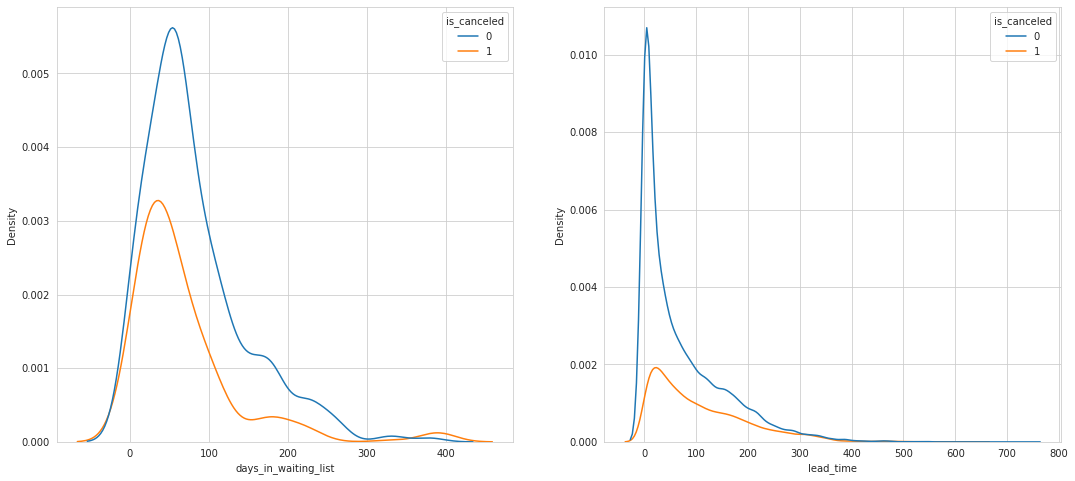

In [ ]:
# Making a selection of bookings that have a waiting time greater than zero

waiting_bookings = hotel_dataset_copy[hotel_dataset_copy['days_in_waiting_list'] !=0] 

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = hotel_dataset_copy['lead_time'], hue = hotel_dataset_copy['is_canceled'])
plt.show()

There is a waiting period of less than 150 days for most of the cancelled bookings, but most of the non-cancelled bookings also have a waiting period less than 150 days.As a result, waiting periods do not affect cancellations. \
\
It is also important to note that lead time has no effect on booking cancellations, as both cancellation and non-cancellation curves are similar regardless of lead time.

It is now time to check whether not getting the booked room type is causing cancellations.

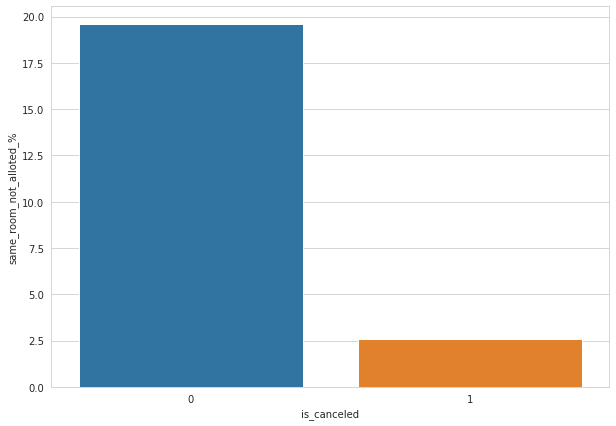

In [ ]:
def checking_room_alloted(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

hotel_dataset_copy['same_room_not_alloted'] = hotel_dataset_copy.apply(lambda x : checking_room_alloted(x), axis = 1)
groupby_canceled = hotel_dataset_copy.groupby('is_canceled')

Data_3 = pd.DataFrame((groupby_canceled['same_room_not_alloted'].sum()/groupby_canceled.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = Data_3.index, y = Data_3['same_room_not_alloted_%'])
plt.show()

Getting the same room as requested is not a cancellation. There is a significant percentage of bookings that are not canceled even after receiving a different room than requested.

Let's see whether getting a different room affects the ADR.

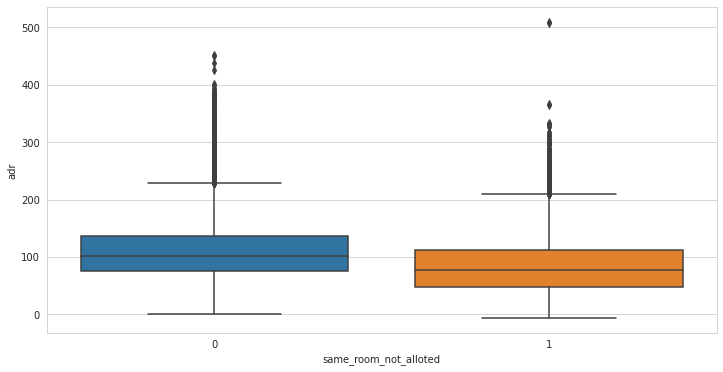

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = hotel_dataset_copy)
plt.show()

It does affect the adr, people who didn't get the same room paid a little lower adr, except in a few cases.

#What are the top countries from which guests are coming ?

In [ ]:
guests_country = hotel_dataset_copy[hotel_dataset_copy['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_country.columns = ['country', 'No of guests']
guests_country

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [ ]:
import folium
country_map = folium.Map()
guests_country_map = px.choropleth(guests_country, locations = guests_country['country'],color = guests_country['No of guests'], hover_name = guests_country['country'])
guests_country_map.show()

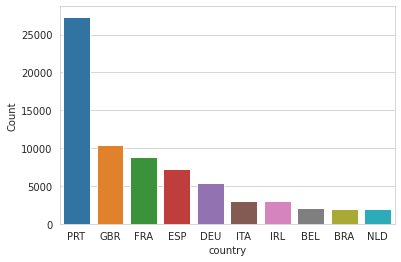

In [ ]:
country_groupby = hotel_dataset_copy.groupby('country')
data_1 = pd.DataFrame(country_groupby.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = data_1['country'], y  = data_1['Count'])
plt.show()

Most guest are from Portugal and other Europian contries.

# What is the average length of stay at hotels?



In [ ]:
canceled_filter_data = hotel_dataset_copy['is_canceled'] == 0
df_1 = hotel_dataset_copy[canceled_filter_data]
df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,Num_of_bookings,same_room_not_alloted
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,NaN,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,NaN,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,NaN,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,NaN,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,NaN,0


In [ ]:

df_1['total_nights'] = df_1['stays_in_weekend_nights'] + df_1['stays_in_week_nights']
df_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,Num_of_bookings,same_room_not_alloted,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,2,NaN,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,2,NaN,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,1,NaN,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,1,NaN,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2,2,NaN,0,2


In [ ]:
staytime = df_1.groupby(['total_nights', 'hotel']).agg('count').reset_index()
staytime = staytime.iloc[:, :3]
staytime = staytime.rename(columns={'is_canceled':'Number of stays'})
staytime

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


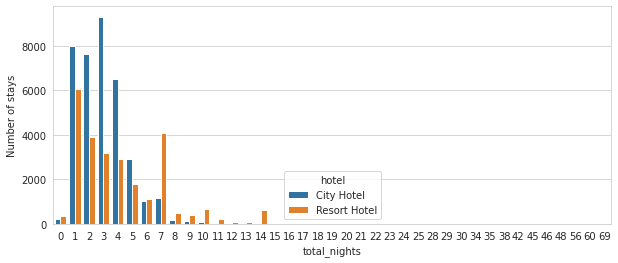

In [ ]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= staytime,hue='hotel')


Most people prefer to stay at the hotels of less then 5 days.

# Conclusion 
•	The City Hotel is busier than the Resort Hotel since around 60% of bookings are for the City Hotel and 40% are for the Resort Hotel.

•	 For longer stays in hotels, resort hotels are preferred. *Most guests stay in hotels for less than 5 days.

•	Both hotels have high cancellation rates, and less than 3% of guests return to the City hotel for another booking. 5% of guests return to the Resort hotel after staying there.

•	Most of the guests came from European countries, with Portugal being the most popular.

●Guests use different channels for making bookings, with TA/TO being the most popular.

•	Hotels should increase their popularity on the GDS channel as higher adr deals come via this channel.

•	Almost 30% of bookings via TA/TO are cancelled.

•	Cancellation of bookings is not affected by not receiving the same room as reserved, longer lead time, or waiting time. Although different room allotment do lowers the adr.

•	The most profitable months for both hotels are July and August.

•	As the month ends, the adr gradually increases, with small increases on weekends.

•	The most common guest group for hotels is couples, so hotels can tailor their services to meet the needs of couples in order to increase revenue.

•	Special requests are likely to increase as the number of guests increases.

•	Bookings made via complementary market segments and adults have a higher number of special requests.

•	A longer stay (more than 15 days) generally results in a lower ADR for the customer.



##  References-
•	GeeksforGeeks

•	Kaggle

•	Analytics Vidhya

